In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [31]:
#Let's see which encoding we have to apply.
with open("Bengaluru_House_Data.csv","rb") as f:
    result=chardet.detect(f.read(100000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [32]:
#so,we have to apply GB2312 encoding.
data=pd.read_csv("Bengaluru_House_Data.csv",sep = ',' ,encoding="GB2312")

In [33]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [35]:
data.shape

(13320, 9)

In [36]:
df0=data.copy()

In [37]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [39]:
data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


            Visuavalization of missing values

<Axes: >

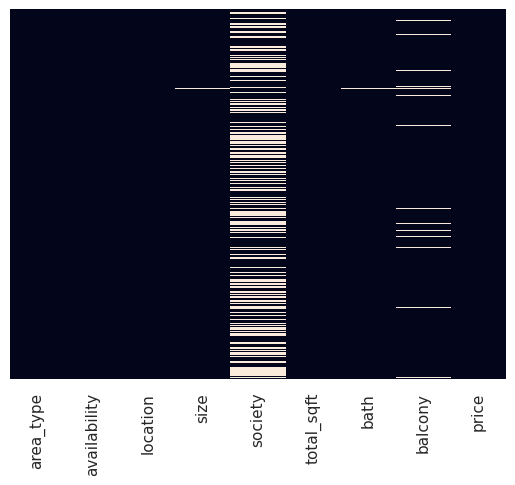

In [40]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [42]:
#Drop 'DOM' Columns
data.drop(columns=['DOM'], errors='ignore', inplace=True)


In [44]:
data.society.fillna(data.society.mode(),inplace=True)

In [45]:
data.bath.fillna(data.bath.mode(),inplace=True)

In [46]:
data.location.fillna(data.location.mode(),inplace=True)

In [48]:
data['size'].fillna(data['size'].mode()[0], inplace=True)


In [49]:
data.balcony.fillna(data.balcony.mode(),inplace=True)

In [51]:
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

EDA

In [53]:
df1=data[['area_type','availability','location','size','society','total_sqft','bath','balcony','price']]

In [55]:
def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(15, 6))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)

   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

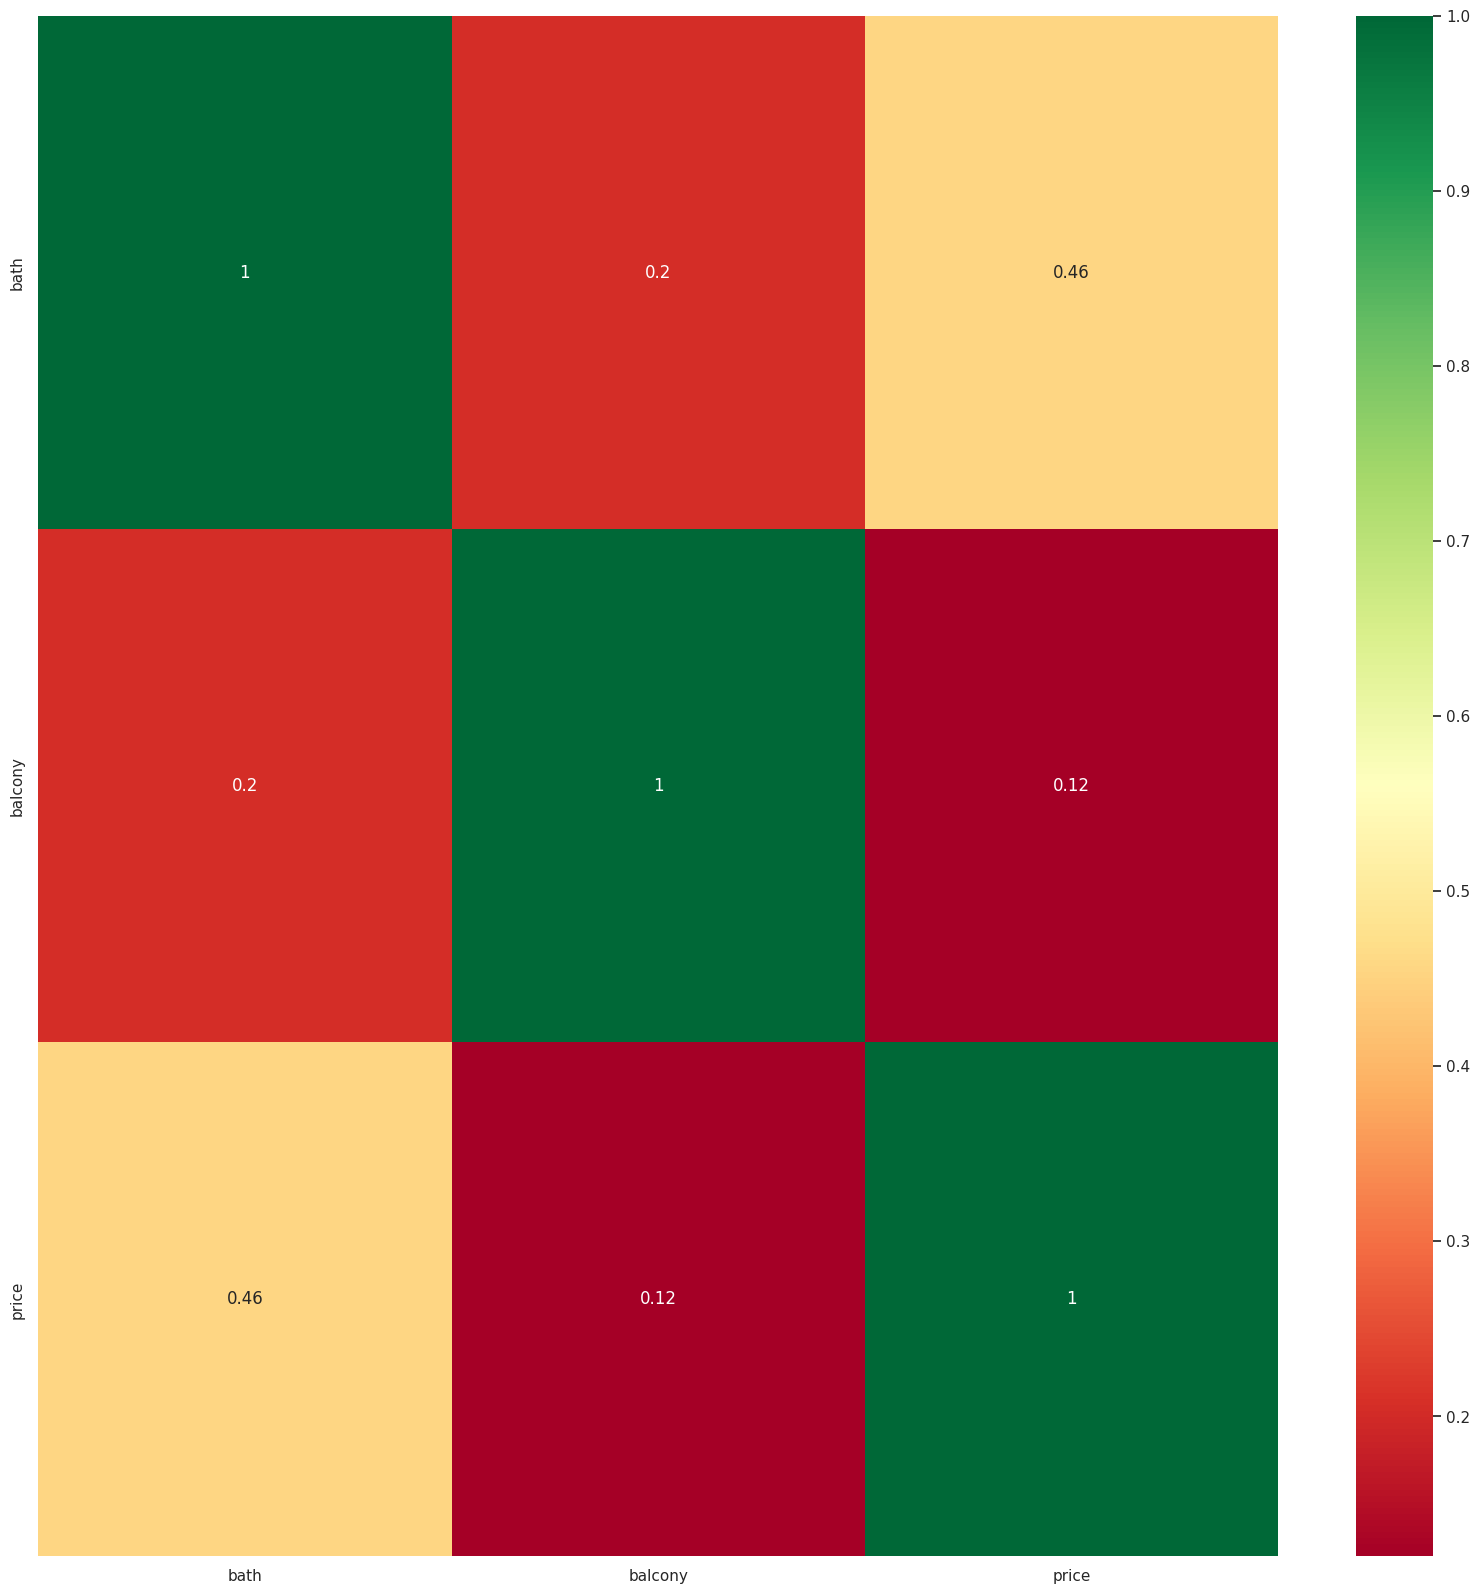

In [57]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, cmap="RdYlGn")
plt.show()


In [63]:
transactions_master_df = pd.read_csv('Bengaluru_House_Data.csv', sep=',', \
                                     dtype={'zip_code': str}, encoding='latin1')
transactions_master_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [64]:
transactions_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


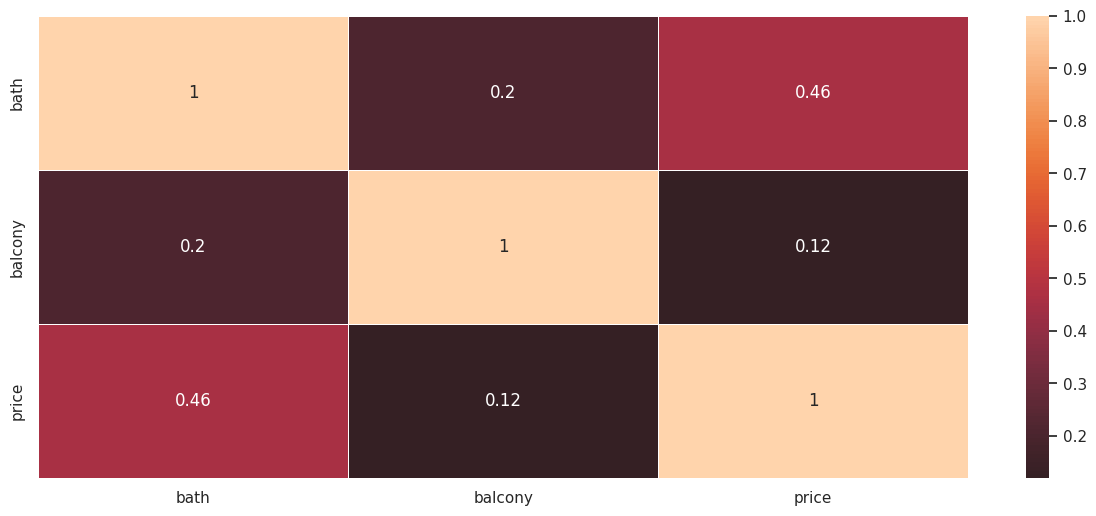

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(
    data=transactions_master_df.select_dtypes(include='number').corr(),
    linewidths=0.5,
    center=0,
    annot=True,
    ax=ax
)
plt.show()


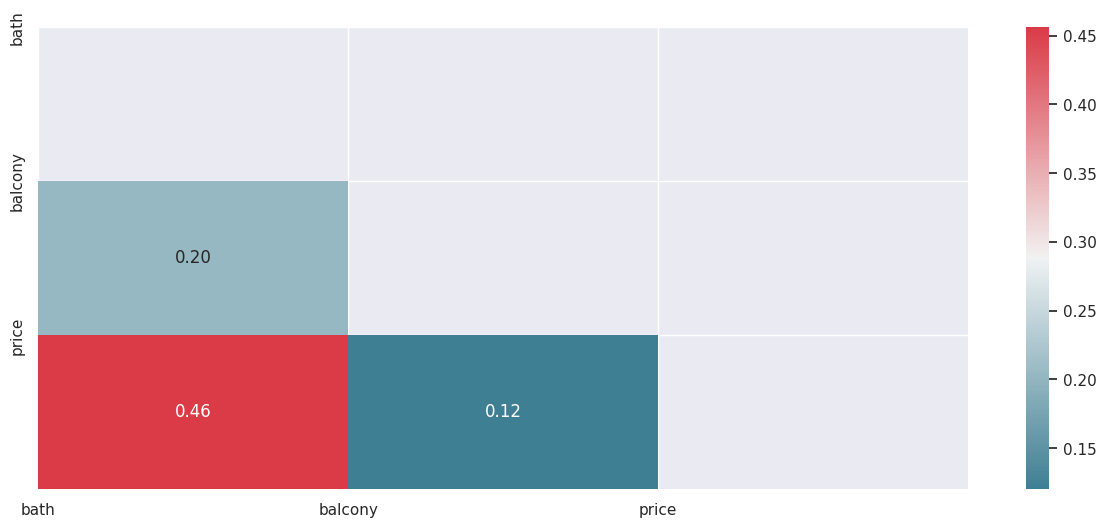

In [68]:
numeric_df = transactions_master_df.select_dtypes(include='number')
heatMap(numeric_df, False)


In [71]:
print(transactions_master_df['area_type'].nunique())
print(transactions_master_df['total_sqft'].nunique())
print(transactions_master_df['location'].nunique())
print(transactions_master_df['size'].nunique())
print(transactions_master_df['society'].nunique())


4
2117
1305
31
2688


In [72]:
print(transactions_master_df['area_type'].value_counts())
print(transactions_master_df['total_sqft'].value_counts())
print(transactions_master_df['location'].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
total_sqft
1200           843
1100           221
1500           205
2400           196
600            180
              ... 
2920             1
5665.84          1
1369             1
7150             1
1200 - 1470      1
Name: count, Length: 2117, dtype: int64
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64


ML PIPELINE

In [73]:
transactions_master_df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [75]:
target = transactions_master_df['price'].values
features = transactions_master_df[['area_type','availability','location','size','society','total_sqft','bath','balcony','price']]

features.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [76]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=21)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [77]:
categorical_features = (features.dtypes == 'object')
numerical_features = ~categorical_features

In [78]:
categorical_features[categorical_features == True].index.tolist()

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [79]:
numerical_features

,0
area_type,False
availability,False
location,False
size,False
society,False
total_sqft,False
bath,True
balcony,True
price,True


Custom Transformer

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features=None, reindex_columns=None):
        self.categorical_features = categorical_features
        self.reindex_columns = reindex_columns
        self.updated_feature_names = None

    def transform(self, X, **transformparams):
        #print (transformparams.get('arg1'))
        self.updated_feature_names = []
        hot_encoded_df = pd.get_dummies(data=X, columns=self.categorical_features, \
                                        drop_first=False).copy()
        # Lets reindex this thing, which will add any missing columns in the passed data
        print(hot_encoded_df.shape)
        hot_encoded_df = hot_encoded_df.reindex(columns=self.reindex_columns, fill_value=0)
        print(hot_encoded_df.shape)
        # Now we have reformed the encoded dataframe by filling any missing columns
        self.updated_feature_names = hot_encoded_df.columns
        return hot_encoded_df

    def fit(self, X, y=None, **fitparams):
        return self

    def get_feature_names(self):
        return self.updated_feature_names

In [81]:
columns_to_encode = categorical_features[categorical_features == True].index.tolist()

reindex_hot_encoding = []
# Iterating through all the columns in feature set
for column in features.columns:
    # If the column name is in the columns_to_encode list, append all the unique values of that column
    if column in columns_to_encode:
        # Ignore the first unique value, we drop it in reindex list instead of using drop=True in get_dummies later
        for count, item in enumerate(features[column].unique()):
            if count is not 0:
                reindex_hot_encoding.append(item)
    # If the column name is not in the columns_to_encode list, append the column name itself
    else:
        reindex_hot_encoding.append(column)
reindex_hot_encoding

['Plot  Area',
 'Built-up  Area',
 'Carpet  Area',
 'Ready To Move',
 '18-May',
 '18-Feb',
 '18-Nov',
 '20-Dec',
 '17-Oct',
 '21-Dec',
 '19-Sep',
 '20-Sep',
 '18-Mar',
 '20-Feb',
 '18-Apr',
 '20-Aug',
 '18-Oct',
 '19-Mar',
 '17-Sep',
 '18-Dec',
 '17-Aug',
 '19-Apr',
 '18-Jun',
 '22-Dec',
 '22-Jan',
 '18-Aug',
 '19-Jan',
 '17-Jul',
 '18-Jul',
 '21-Jun',
 '20-May',
 '19-Aug',
 '18-Sep',
 '17-May',
 '17-Jun',
 '21-May',
 '18-Jan',
 '20-Mar',
 '17-Dec',
 '16-Mar',
 '19-Jun',
 '22-Jun',
 '19-Jul',
 '21-Feb',
 'Immediate Possession',
 '19-May',
 '17-Nov',
 '20-Oct',
 '20-Jun',
 '19-Feb',
 '21-Oct',
 '21-Jan',
 '17-Mar',
 '17-Apr',
 '22-May',
 '19-Oct',
 '21-Jul',
 '21-Nov',
 '21-Mar',
 '16-Dec',
 '22-Mar',
 '20-Jan',
 '21-Sep',
 '21-Aug',
 '14-Nov',
 '19-Nov',
 '15-Nov',
 '16-Jul',
 '15-Jun',
 '17-Feb',
 '20-Nov',
 '20-Jul',
 '16-Sep',
 '15-Oct',
 '15-Dec',
 '16-Oct',
 '22-Nov',
 '15-Aug',
 '17-Jan',
 '16-Nov',
 '20-Apr',
 '16-Jan',
 '14-Jul',
 'Chikka Tirupathi',
 'Uttarahalli',
 'Lingadhee

In [82]:
pipeline = Pipeline([
    # Preprocessor to perform necessary scaling on the data before running regression
    ('preprocess', ColumnTransformer(transformers=
        [
            ('hot_encoder', CustomOneHotEncoder(categorical_features=columns_to_encode, \
                                                reindex_columns=reindex_hot_encoding), features.columns)
        ]
    )),
    # Using linear regression modeling
    ('linear_reg', LinearRegression())
])

In [86]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            parts = x.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        else:
            return float(x)
    except:
        return None


In [87]:
X_train['total_sqft'] = X_train['total_sqft'].apply(convert_sqft_to_num)


In [88]:
print(X_train['total_sqft'].unique())


[1262.   700.  1403.  ... 1732.5 4830.  3761. ]


In [89]:
import re

def convert_total_sqft(x):
    try:
        # If it's a range (e.g., "620 - 934")
        if '-' in x:
            parts = x.split('-')
            if len(parts) == 2:
                return (float(parts[0]) + float(parts[1])) / 2

        # If it contains units (e.g., "34.46Sq. Meter")
        elif re.match(r'^[0-9.]+', x):
            num = re.findall(r'[0-9.]+', x)
            return float(num[0])

        # If it's a plain number
        return float(x)

    except:
        return None  # Return None for anything we can't convert


In [90]:
X_train['total_sqft'] = X_train['total_sqft'].astype(str).apply(convert_total_sqft)
X_test['total_sqft'] = X_test['total_sqft'].astype(str).apply(convert_total_sqft)  # if you have test data too


In [92]:
import pandas as pd

y_train = pd.Series(y_train)
y_train = y_train.loc[X_train.index]


In [93]:
y_train = y_train[X_train.index]


In [94]:
from sklearn.impute import SimpleImputer
# Inside pipeline, or:
X_train['total_sqft'].fillna(X_train['total_sqft'].mean(), inplace=True)


In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Identify your column types
numeric_features = ['total_sqft', 'bath', 'balcony']  # example numeric columns
categorical_features = ['area_type', 'location', 'size', 'availability']  # example cat columns

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_sqft', 'bath',
                                                   'balcony']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['area_type', 'location',
                                                   'size', 'availability'])])),
                ('model', LinearRegression())])

Model Evaluation

In [97]:
# print the intercept
print("Intercept:", pipeline.named_steps['model'].intercept_)
print("Coefficients:", pipeline.named_steps['model'].coef_)

Intercept: 83.35675382880817
Coefficients: [ 52.59634254  34.46483956   1.23966722 ... -25.94274041 -44.28600672
  -7.45728337]


In [99]:
import pandas as pd

coefficients = pipeline.named_steps['model'].coef_
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)


                                     Feature  Coefficient
0                            num__total_sqft    52.596343
1                                  num__bath    34.464840
2                               num__balcony     1.239667
3              cat__area_type_Built-up  Area   -17.973726
4                cat__area_type_Carpet  Area    -0.323510
...                                      ...          ...
1272                cat__availability_22-Mar     9.690280
1273                cat__availability_22-May    18.982107
1274                cat__availability_22-Nov   -25.942740
1275  cat__availability_Immediate Possession   -44.286007
1276         cat__availability_Ready To Move    -7.457283

[1277 rows x 2 columns]


In [101]:
coefficients = pipeline.named_steps['model'].coef_
print(coefficients)


[ 52.59634254  34.46483956   1.23966722 ... -25.94274041 -44.28600672
  -7.45728337]


In [103]:
# 1. Get feature names after preprocessing
features_post_fit = pipeline.named_steps['preprocessor'].get_feature_names_out()

# 2. Get coefficients from the model
coefficients = pipeline.named_steps['model'].coef_

# 3. Create a labeled DataFrame

coeff_df = pd.DataFrame(data=coefficients, index=features_post_fit, columns=['Coefficient'])
print(coeff_df)

                                        Coefficient
num__total_sqft                           52.596343
num__bath                                 34.464840
num__balcony                               1.239667
cat__area_type_Built-up  Area            -17.973726
cat__area_type_Carpet  Area               -0.323510
...                                             ...
cat__availability_22-Mar                   9.690280
cat__availability_22-May                  18.982107
cat__availability_22-Nov                 -25.942740
cat__availability_Immediate Possession   -44.286007
cat__availability_Ready To Move           -7.457283

[1277 rows x 1 columns]


Model Predictions

In [104]:
predictions = pipeline.predict(X_test)

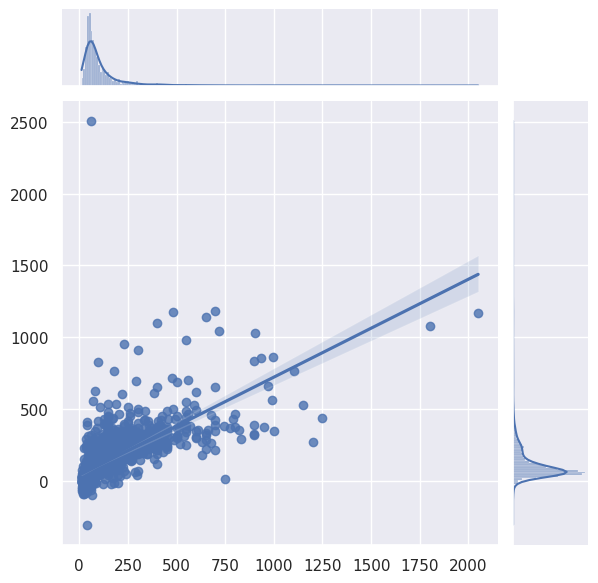

In [105]:
sns.jointplot(x=y_test, y=predictions, kind='reg')

<Axes: ylabel='Density'>

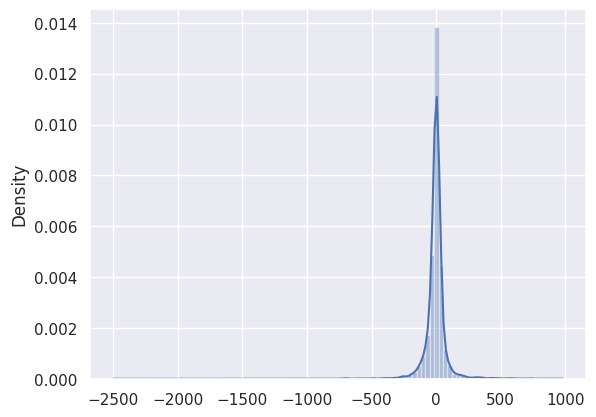

In [106]:
sns.distplot((y_test-predictions), bins=100)

In [107]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(95.91678117857275)

In [108]:
for index, row in X_test[:10].iterrows():
    print(row)
    print(y_test[index])
    print(predictions[index])

area_type       Built-up  Area
availability     Ready To Move
location          Karuna Nagar
size                 3 Bedroom
society                CoinoCu
total_sqft              2500.0
bath                       3.0
balcony                    2.0
price                    180.0
Name: 0, dtype: object
180.0
153.09484219847906
area_type       Built-up  Area
availability     Ready To Move
location               Varthur
size                     2 BHK
society                Vaensia
total_sqft              1210.0
bath                       2.0
balcony                    1.0
price                     60.0
Name: 1, dtype: object
60.0
38.38485156147357
area_type       Built-up  Area
availability     Ready To Move
location           Austin Town
size                     2 BHK
society                    NaN
total_sqft               950.0
bath                       2.0
balcony                    0.0
price                     65.0
Name: 2, dtype: object
65.0
34.71147243525549
area_type       Super b

predictions on external data

In [109]:
X_test.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [111]:
external_data = pd.read_csv('Bengaluru_House_Data.csv')

In [112]:
external_data = pd.DataFrame([{
    'area_type': 'Super built-up  Area',
    'availability': 'Ready To Move',
    'location': 'Whitefield',
    'size': '2 BHK',
    'society': 'Prestige',
    'total_sqft': '1250',
    'bath': 2,
    'balcony': 1
}])


In [113]:
external_data['total_sqft'] = external_data['total_sqft'].astype(str).apply(convert_total_sqft)


In [114]:
prediction = pipeline.predict(external_data)
print("Predicted price:", prediction[0])

Predicted price: 67.24748399569208
